PART 1

QUESTION 1)

Simple Linear Regression is used to show the relationship between two variables: the predictor variable (the independent variable, x) and the outcome variable (the dependent variable, y).  The slope coefficient (a) shows the relationship between these two variables, with a larger slope coefficient indicating a stronger relationship.  The intercept coefficient (b) is the expected value of the outcome variable (y) when the predictor variable (x) is 0.  The error term is a measure of the variability of the outcome variable's values that isn't explained by the predictor variable, since all observations won't fall exactly on the line predicted by the linear regression model.

When using this model, for a given value of x, if we take multiple observations of y, they form a normal distribution, and the error term represents the spread of this distribution.  The deviations of each observation from the line should be a normal distribution.

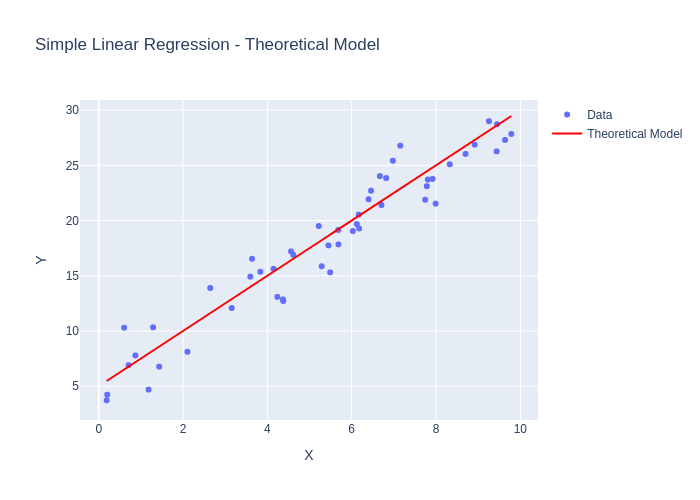

In [5]:
import numpy as np
import plotly.graph_objects as go

# Generate synthetic data
np.random.seed(0)
x = np.random.rand(50) * 10  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, size=50)  # Normally distributed noise
Y = true_slope * x + true_intercept + noise  # Dependent variable with some noise

# Define the theoretical model
theoretical_Y = true_slope * x + true_intercept  # Y values without noise

# Plot the data and theoretical line
fig = go.Figure()

# Scatter plot for the actual data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Line for the theoretical model
fig.add_trace(go.Scatter(x=x, y=theoretical_Y, mode='lines', name='Theoretical Model', line=dict(color='red')))

# Update plot layout
fig.update_layout(
    title='Simple Linear Regression - Theoretical Model',
    xaxis_title='X',
    yaxis_title='Y',
    showlegend=True
)

fig.show(renderer = "png")


QUESTION 2)

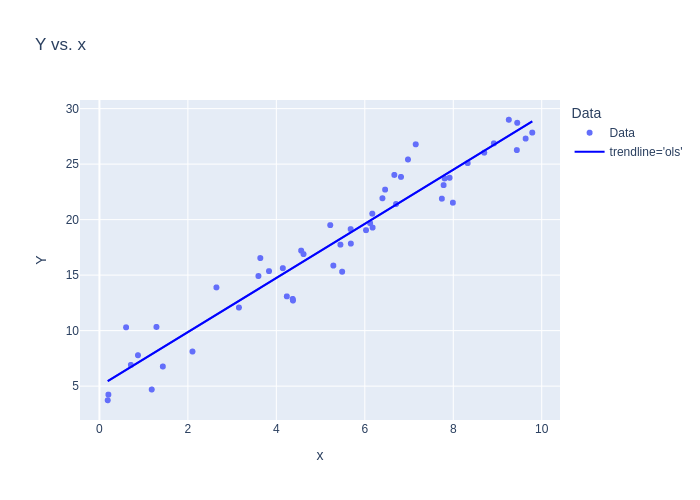

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.formula.api as smf  # This library is for statistical modeling
import plotly.express as px  # this is a ploting library

np.random.seed(0)
x = np.random.rand(50) * 10  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, size=50)  # Normally distributed noise
Y = true_slope * x + true_intercept + noise  # Dependent variable with some noise

df = pd.DataFrame({'x': x, 'Y': Y})  # Define the DataFrame

# These next two lines create a regression model and fits it to the data
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary()  # summary including coefficient estimates, p-value, overall model fit
fitted_model.summary().tables[1]  # provides detailed statistics about the coefficients
fitted_model.params  # gives estimated coefficients, and the relationship between the independent and dependent variables
fitted_model.params.values  # returns the estimated coefficent values so they can be used for numerical operations
fitted_model.rsquared  # returns R-squared statistic, which says how well the independent variable explains the variability of the dependent variable

# the next two lines add a trendline to the figure, and a title.
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

QUESTION 3)

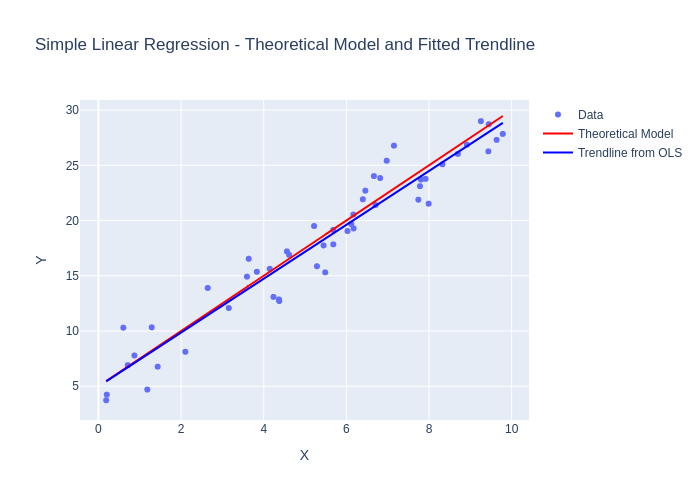

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf  # For statistical modeling

# Generate synthetic data
np.random.seed(0)
x = np.random.rand(50) * 10  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, size=50)  # Normally distributed noise
Y = true_slope * x + true_intercept + noise  # Dependent variable with some noise

# Define the theoretical model
theoretical_Y = true_slope * x + true_intercept  # Y values without noise

# Create DataFrame for modeling
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a regression model
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

# Plot the data and both lines
fig = go.Figure()

# Scatter plot for the actual data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Line for the theoretical model
fig.add_trace(go.Scatter(x=x, y=theoretical_Y, mode='lines', name='Theoretical Model', line=dict(color='red')))

# Line for the fitted trendline from regression
fig.add_trace(go.Scatter(x=x, y=fitted_model.fittedvalues, mode='lines', name="Trendline from OLS", line=dict(color='blue')))

# Update plot layout
fig.update_layout(
    title='Simple Linear Regression - Theoretical Model and Fitted Trendline',
    xaxis_title='X',
    yaxis_title='Y',
    showlegend=True
)

# Show the plot
fig.show(renderer="png")


Explanation for question 3:

The red line is purely theoretical, so this is what the trendline would look like if the data was perfect.  However, since there are random variations/noise in the sample, the trendline from OLS does not perfectly match the theoretical trendline.  The trendline from OLS is more accurate for this sample than the theoretical line is.  If we ran this code for many samples, the red line would always stay the same, while the blue line would change slightly to fit the sample.

QUESTION 4)

fitted_model.fittedvalues are predictions of what the outcome variable (y) is expected to be for each observation in the data.  They are based on the predictor variable (x).  Information about this variable, such as the coefficients that represent its relationship with y, are stored in fitted_model.summary().tables[1], fitted_model.params, and fitted_model.params.values, so these can be used to create the estimates/predictions of fitted_model.fittedvalues.

QUESTION 5)

Using the OLS method chooses the line for the fitted model that has the smallest sum of the squared differences between the theoretical/predicted values and the actual values in the data.  This requires the use of squares of differences rather than the original differences because this ensures that all values are positive, and gives extra weight to large differences, allowing the fitted model to minimize them with its chosen line.

QUESTION 6)

The first statement calculates the sum of the squares of the observations from their predicted values, and then divides this by the sum of differences between the observed values and the mean of their values.  It then subtracts this from 1, giving a value between 0 and 1.  The close to 1 this value is, the stronger the relationship between x and y is.  In other words, this is the proportion of variation in y that can be explained by the fitted values model.

The second statement is just another way of calculating r-squared, which the first statement also does.  Again, the closer the value it produces is to 1, the higher the proportion of variation in y that can be explained by x.

The third statement also calculates r-squared, or the correlation between the y-values and their predicted values.  The fourth statement, on the other hand, calculates the correlation between the observed y-values and the independent variable x.

QUESTION 7)

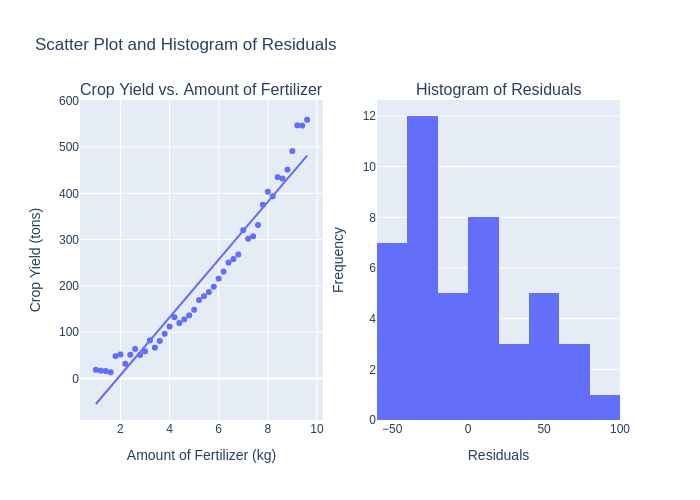

In [16]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 7 explanation:

The simple linear regression model assumes that the data is linear, and this is exponential data, so we can't use linear regression here.  We also assume that the residuals are normally distributed, but these are right-skewed, which is likely related to the data being non-linear.  For these reasons, linear regression isn't a good fit for this data.

Notebook LM summaries:

Question 1:

"This conversation explored the normality assumption in simple linear regression. The initial question focused on whether multiple observations of the outcome variable (y) for a given value of the predictor variable (x) form a normal distribution. The expert clarified that this is not the case, emphasizing that the normality assumption applies to the error term in the model, which represents the difference between the predicted y and the observed y for each x.
The conversation then examined how predictor variables, outcome variables, slope, intercept, and the error term relate to the normal distribution in simple linear regression. The expert explained that the combination of these components does not directly form a sample from a normal distribution. Instead, the focus is on the distribution of the error term itself, which is assumed to be normal.
Finally, the conversation explored Python code to demonstrate a simple linear regression model. The expert provided Python code using libraries like pandas, numpy, and statsmodels to illustrate the model. The code demonstrated generating sample data, fitting a model, extracting parameters, and calculating residuals.
Note: The expert clarified that the provided Python code is based on general programming knowledge and common data science libraries, and not directly derived from the provided sources."

Question 6:

"Since our last summary about R-squared, the conversation focused on understanding alternative ways to calculate it, specifically using correlation.
You correctly described that:●
np.corrcoef(Y, fitted_model.fittedvalues)**2 calculates R-squared in simple linear regression by squaring the correlation coefficient between the observed y-values (Y) and their predicted values (fitted_model.fittedvalues).●
np.corrcoef(Y, x)**2 also calculates R-squared in simple linear regression, but it directly uses the square of the correlation between the observed y-values (Y) and the independent variable (x).
The key takeaway here is that both expressions are valid ways of calculating R-squared in simple linear regression. This is because, in this specific type of regression, R-squared is mathematically equivalent to the square of the correlation coefficient between the dependent and independent variables.
The fitted values in a simple linear regression model are directly derived from the independent variable, x. As a result, the correlation between Y and the fitted values is the same as the correlation between Y and x.
The conversation also highlighted that the NumPy function np.corrcoef() produces a correlation coefficient matrix, and you need to extract the relevant correlation coefficient from this matrix using indexing () before squaring it to obtain R-squared.
While the sources you provided don't explicitly mention these correlation-based methods for calculating R-squared, they offer the foundational concepts:●
The use of smf.ols() with "R-style" formulas like y~x suggests a focus on simple linear regression, where the relationship between R-squared and squared correlation holds.●
The emphasis on data summarization in the sources aligns with the concept of correlation as a summary statistic describing the relationship between two variables.●
The mention of the .rsquared attribute reinforces that R-squared is a central output of an OLS regression model.
However, it is crucially important to remember that this equivalence between squared correlation and R-squared does not generally apply to multiple linear regression (where there are multiple independent variables).
In multiple linear regression, the fitted_model.rsquared would represent the proportion of variation in the dependent variable explained by the combined effect of all independent variables. Calculating the squared correlation between the dependent variable and a single independent variable would not accurately represent the overall R-squared of the model."

Question 7:

"The last part of our conversation explored the assumptions underlying the simple linear regression model, even though the sources don't explicitly list them out. Here's a consolidated summary:
Assumptions Supported by the Sources:●
Linearity: The sources heavily rely on linear equations like "y = ax + b" and formulas like "y~x" when discussing simple linear regression. This strongly suggests that the relationship between the dependent variable (y) and the independent variable (x) should be linear.●
Independence: The frequent references to "independent" samples and data points across the sources underscore the importance of independence in statistical analysis, including regression. The concept of the standard error decreasing with larger sample sizes also depends on this assumption.●
Normally Distributed Errors: Source states that simple linear regression "is a normal distribution," which, in the context of regression, most likely refers to the errors (or residuals) being normally distributed. The sources discuss using histograms and kernel density estimators to visually examine the shape of distributions, a technique applicable to residuals. Additionally, the mention of "the sampling distribution under the null" in hypothesis testing relates to the assumption of normally distributed errors in simple linear regression.●
Constant Variance of Errors (Homoscedasticity): Although not explicitly stated, the sources extensively cover the concept of variance, differentiating between sample and population variance. In simple linear regression, homoscedasticity—the assumption that the variance of errors is constant across all values of the independent variable—is essential.
Important Additional Assumptions (Not Explicitly in Sources):●
Random Sampling: This is a fundamental assumption in many statistical analyses, ensuring that the sample represents the population.●
No Perfect Multicollinearity: This primarily applies to multiple linear regression with two or more independent variables, stating that no two independent variables should have a perfect linear relationship. It isn't directly relevant to simple linear regression with just one independent variable.
Why Assumptions Matter:
These assumptions are critical because violating them can:●
Bias: Lead to biased estimates of the regression coefficients (the 'a' and 'b' in "y = ax + b"), making them unreliable.●
Inaccurate Inferences: Make any conclusions drawn from the model misleading and potentially incorrect.
Checking if Assumptions Hold:
To verify these assumptions, statisticians use various tools:●
Residual Plots: Plotting residuals against fitted values or the independent variable helps spot violations of linearity, constant variance, and normality of errors.●
Statistical Tests: Formal tests can assess the normality of residuals and check for heteroscedasticity (non-constant variance).
In summary, while the sources don't explicitly list all the assumptions, they provide enough information to understand their importance. Linearity, independence, normality of errors, and constant variance of errors emerge as crucial assumptions, either directly or indirectly, from the source material. Keep in mind that additional assumptions like random sampling and no multicollinearity also play a role in ensuring the validity of your simple linear regression model."

ChatGPT links + summaries:

Question 1:  https://chatgpt.com/share/67296428-2884-800c-b0d5-740f9142851f

"In this chat, we discussed the simple linear regression model, including its components (predictor and outcome variables, slope, intercept, and error term) and the distinction between fitted and theoretical models. We wrote Python code to generate synthetic data and visualize a theoretical linear model using Plotly, where the slope and intercept were predefined and not fitted to the data points. This theoretical model displays the expected relationship between variables without adjusting based on the data, whereas a fitted model would calculate optimal parameters using regression to best fit the observed data."

Question 2: https://chatgpt.com/share/67296457-7c94-800c-934e-aec102717ce5

"In this chat, the user encountered a NameError due to an undefined DataFrame (df) while trying to fit a linear regression model using Statsmodels. I provided step-by-step guidance on how to create a Pandas DataFrame with synthetic data generated using NumPy and use it to fit an Ordinary Least Squares (OLS) regression model. I explained the purpose of each line in the code, including generating summary statistics and visualizing the model with Plotly. Finally, I provided a complete code example that resolves the error and visualizes the regression results with an OLS trendline in a scatter plot."

Question 3: https://chatgpt.com/share/6729647b-558c-800c-8f74-a79bb36473c7

"In this chat, we combined two pieces of code to create a single graph showing both a theoretical model (without noise) and an OLS regression trendline (fitted to noisy data). We discussed the differences: the theoretical line represents the ideal, noise-free relationship, while the regression trendline is an empirical estimate based on the noisy data. The theoretical line remains constant across samples, but the regression trendline adjusts slightly with each sample due to noise. The regression trendline provides a better fit for the specific sample, while the theoretical line reflects the "true" underlying relationship."

Question 4: https://chatgpt.com/share/672964af-9710-800c-941c-97f740de051d

"fitted_model.fittedvalues contains the predicted values of the outcome variable (
𝑦
y) for each observation, based on the predictor variables (
𝑥
x) and the model’s estimated coefficients. These coefficients, which quantify the relationship between 
𝑥
x and 
𝑦
y, are stored in fitted_model.params and detailed in fitted_model.summary().tables[1]. These parameters are used to generate the predictions in fitted_model.fittedvalues."

Question 5 and 6: https://chatgpt.com/share/672964f7-6554-800c-b808-a000bd489168

"Here's a summary of our discussion:
OLS and Squaring: We covered why the OLS method uses the squared differences, which ensures all values are positive and emphasizes larger errors, leading to a well-defined optimization problem.

𝑅
2
R 
2
  Calculation: We discussed the manual formula for calculating 
𝑅
2
R 
2
 , showing it measures the proportion of variance in the dependent variable explained by the model. We also confirmed that fitted_model.rsquared provides the same 
𝑅
2
R 
2
  value, making both methods equivalent.

High 
𝑅
2
R 
2
  Interpretation: A high 
𝑅
2
R 
2
  suggests a strong relationship between the independent and dependent variables, but context is important, and a high 
𝑅
2
R 
2
  alone doesn’t confirm the model is optimal.

Squared Correlation Expressions: We examined two expressions, 
𝑛
𝑝
.
𝑐
𝑜
𝑟
𝑟
𝑐
𝑜
𝑒
𝑓
(
𝑌
,
fitted values
)
[
0
,
1
]
2
np.corrcoef(Y,fitted values)[0,1] 
2
  and 
𝑛
𝑝
.
𝑐
𝑜
𝑟
𝑟
𝑐
𝑜
𝑒
𝑓
(
𝑌
,
𝑥
)
[
0
,
1
]
2
np.corrcoef(Y,x)[0,1] 
2
 . The first calculates the squared correlation between actual values and model predictions, similar to 
𝑅
2
R 
2
 , while the second gives the squared correlation between the independent variable(s) and actual values directly. These two values are related but measure different things."

PART 2

QUESTION 8)

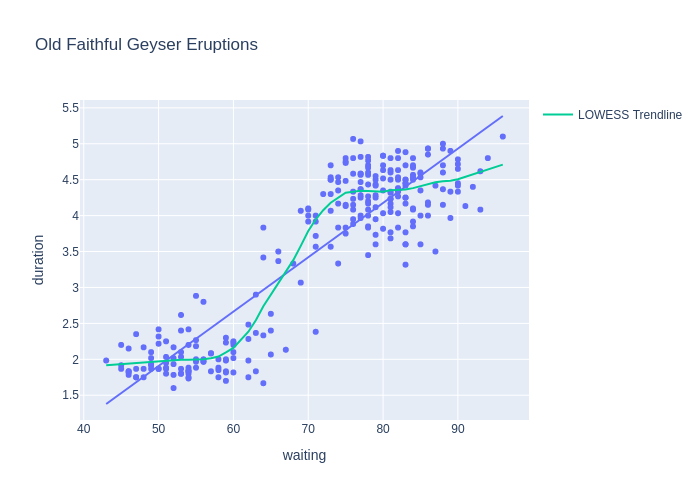

In [84]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Null Hypothesis: 

There is no linear association (on average) between the amount of time between eruptions of Old Faithful and the duration of the eruptions.

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:26:09   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion/Interpretation:

We reject the null hypothesis with a p-value of 0.000, meaning that there is very strong evidence against the null hypothesis.  In other words, we can be very confident that there is a correlation between the time between eruptions and the duration of the eruption.

QUESTION 9)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


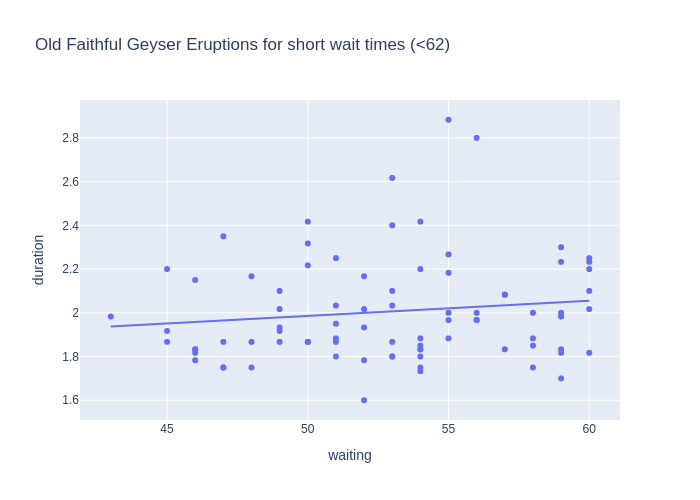

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


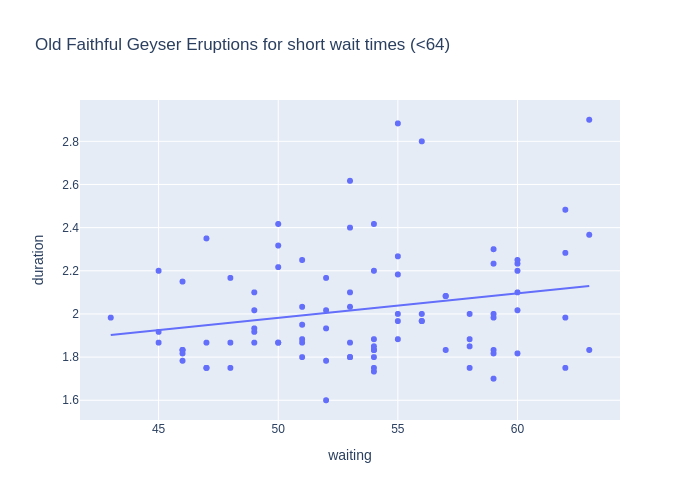

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


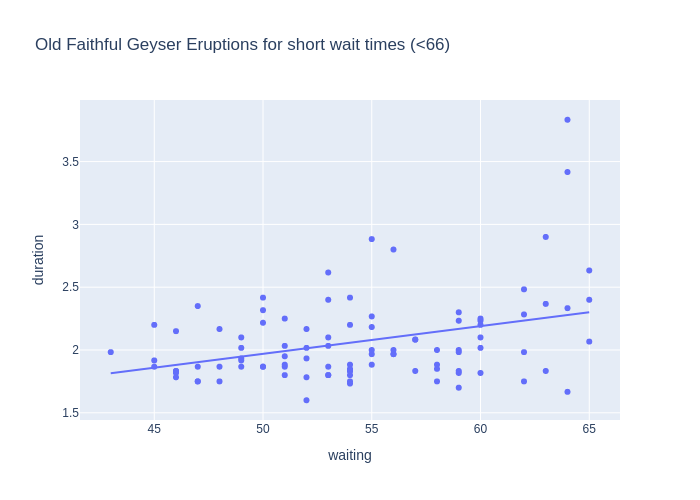

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

QUESTION 9 Interpretation:

When wait time is below 62 minutes, we fail to reject the null hypothesis with a p-value of 0.238, meaning that there is no evidence against the null hypothesis.  This means that wait time is not a strong predictor of duration of eruption when the time between eruptions is this short.

When wait time is below 64 minutes, we reject the null hypothesis with a p-value of 0.036, meaning we have moderate evidence against the null hypothesis.  In other words, there is a correlation between wait time and duration when the wait time is below 64 minutes, but it is not extremely strong, so wait time is only a moderately good predictor of duration.

When wait time is below 66 minutes, we reject the null hypothesis with a p-value of 0.000, meaning we have very strong evidence against the null hypothesis.  Therefore, there is a very strong relationship between wait time and duration of Old Faithful's eruptions, and wait time is a very good predictor for length of eruption.

QUESTION 10)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


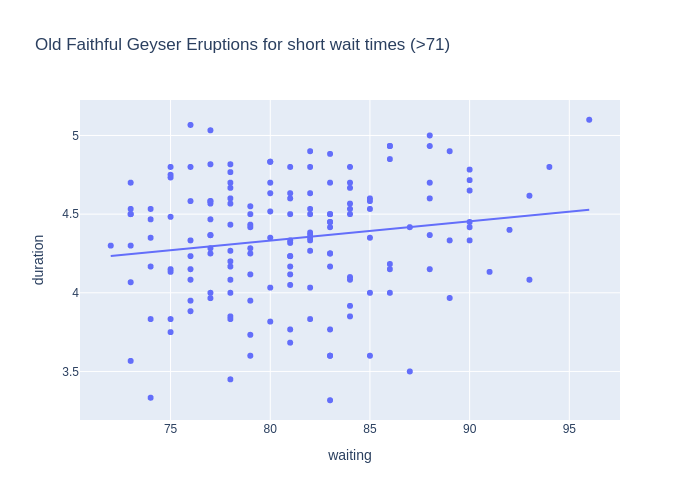

In [30]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

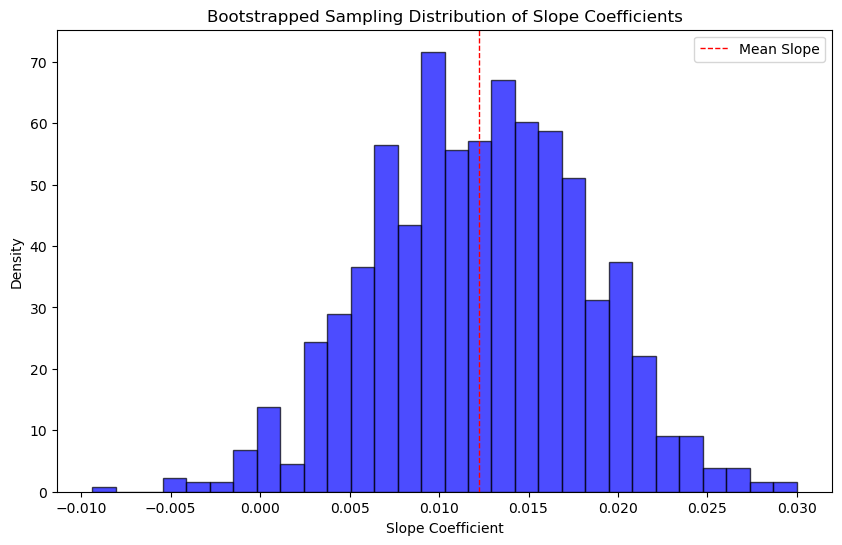

95% Confidence Interval for the slope: [0.0005104  0.02344085]


In [62]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 1000  # Number of bootstrap samples
slopes = []  # List to store the fitted slope coefficients

for _ in range(num_samples):
    boot_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    X = sm.add_constant(boot_sample['waiting'])
    y = boot_sample['duration']
    model = sm.OLS(y, X).fit()
    slopes.append(model.params['waiting'])

plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Density')
plt.axvline(x=np.mean(slopes), color='red', linestyle='dashed', linewidth=1, label='Mean Slope')
plt.legend()
plt.show()

confidence_interval = np.quantile(slopes, [0.025, 0.975])
print("95% Confidence Interval for the slope:", confidence_interval)

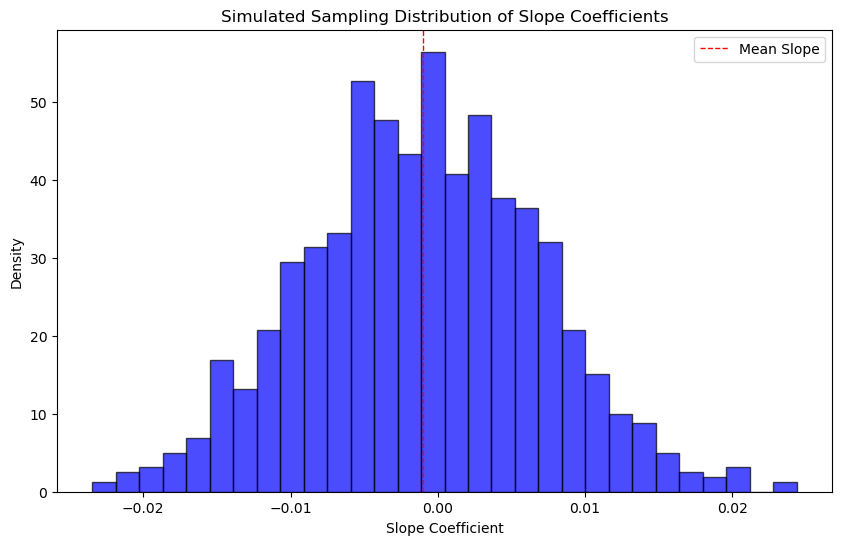

95% Confidence Interval for the slope: [-0.01635072  0.01414092]


In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'old_faithful' is already defined and long_wait is set
num_samples = 1000  # Define the number of bootstrap samples
sample_size = 160   # Sample size for each simulated sample

# Create the simulated dataset under the null hypothesis
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=old_faithful_simulation.shape[0])

simulated_slopes = []

for _ in range(num_samples):
    # Sample from the simulated data, not the original data
    boot_sample = old_faithful_simulation.sample(n=sample_size, replace=True)
    X = sm.add_constant(boot_sample['waiting'])
    y = boot_sample['duration']
    model = sm.OLS(y, X).fit()
    simulated_slopes.append(model.params['waiting'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(simulated_slopes, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Simulated Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Density')
plt.axvline(x=np.mean(simulated_slopes), color='red', linestyle='dashed', linewidth=1, label='Mean Slope')
plt.legend()
plt.show()

# Print the 95% confidence interval for the slope coefficients
confidence_interval = np.quantile(simulated_slopes, [0.025, 0.975])
print("95% Confidence Interval for the slope:", confidence_interval)


In [67]:
bootstrapped_slope_coefficients = np.array(slopes)
print("95% Bootstrapped CI:", np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975]))

simulated_slope_coefficients = np.array(simulated_slopes)
print("P-value:", (np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean())

smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

95% Bootstrapped CI: [0.0005104  0.02344085]
P-value: 0.124


/tmp/ipykernel_70/16001592.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


Therefore, 0 is not within the 95% confidence interval for bootstrapped means.  However, my simulated p-value of 0.124 does not match smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1].  I'm not exactly sure why this is, and interacting with chatbots for a while didn't help with that much.

QUESTION 11)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


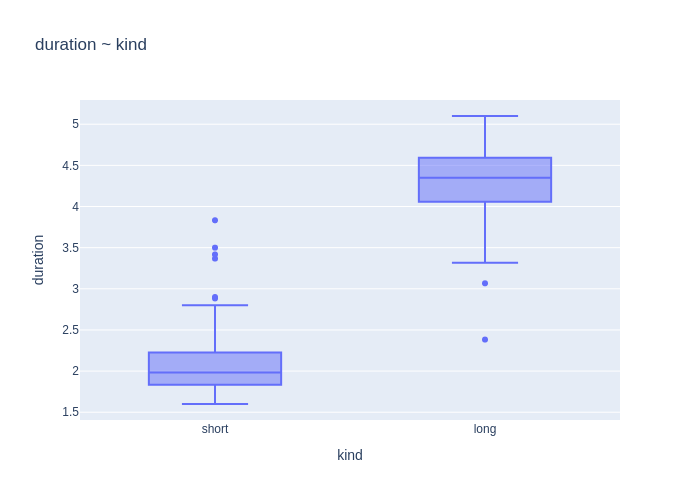

In [9]:
import plotly.express as px

short_wait_limit = 68
long_wait_limit = 68

short_wait = old_faithful.waiting < short_wait_limit
long_wait = old_faithful.waiting > long_wait_limit

from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

QUESTION 11 Explanation/Interpretation:

This new model displays two box plots, one with only the short wait times and one with the long wait times (cutoff at 68 minutes).  This allows the median and percentiles for each of these groups, allowing them to be compared side by side.  It also calculates the coefficients, p-value, and 95% confidence interval.

Of the other three models previously looked at, smf.ols('duration ~ waiting', data=old_faithful) is a linear model comparing all the data points, regardless of the wait time between eruptions.  This allowed a visualization comparing them, and calculates the strength of the relationship between wait time and eruption duration with no time cutoff.  smf.ols('duration ~ waiting', data=old_faithful[short_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait]) do the same calculation and visualization of the relationship, but they only show for the short OR long wait times, respectively.  These models all also calculate the p-value.

We reject the null hypothesis with a p-value of 0.000, meaning we have very strong evidence against the null hypothesis that there is no difference between the long and short groups on average.  In other words, there is a statistically significant difference between the wait time and duration.  This means that wait time is a strong predictor of duration, since if there was no relationship, the groups would be expected to overlap, but they do not.

QUESTION 12)

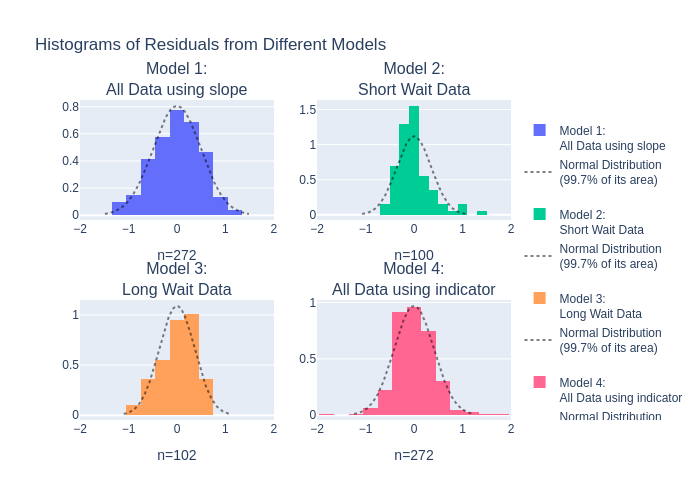

In [7]:
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import seaborn as sns

old_faithful = sns.load_dataset('geyser')

short_wait_limit = 68
long_wait_limit = 78

short_wait = old_faithful.waiting < short_wait_limit
long_wait = old_faithful.waiting > long_wait_limit

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Only model 1's histogram shows a normal distribution of error terms.

Model 2's histogram is right-skwed, while model 3's is left-skewed.  While the histogram for model 4 looks somewhat normally distributed, it has a larger spread than would be expected, so it is not quite normal.

QUESTION 13)

Part A: permutation test

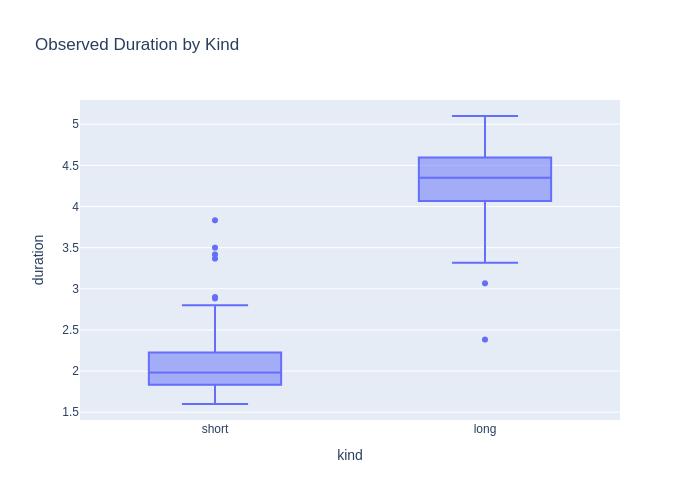

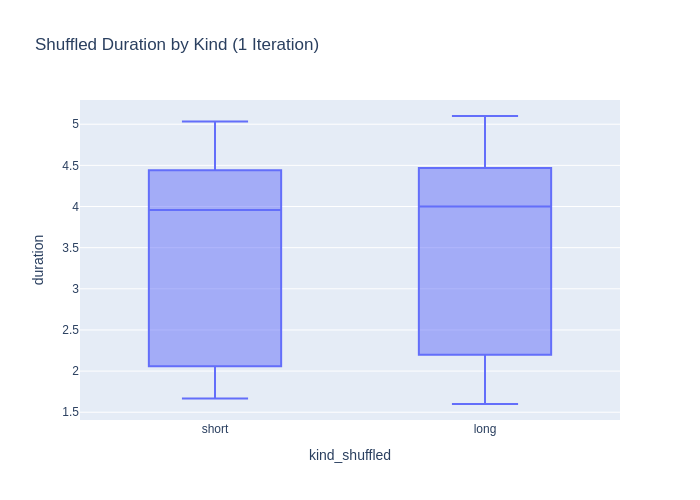

Observed mean difference: 2.2092430994152052
P-value from permutation test: 0.0


In [19]:
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from IPython.display import display

# Define limits and assign groups
short_wait_limit = 68
long_wait_limit = 68

# Define 'kind' based on waiting times
old_faithful['kind'] = np.where(old_faithful['waiting'] < short_wait_limit, 'short', 
                                np.where(old_faithful['waiting'] > long_wait_limit, 'long', 'exclude'))

# Filter to include only 'short' and 'long' kinds
filtered_data = old_faithful[old_faithful['kind'].isin(['short', 'long'])]

# Observed mean difference
observed_diff = filtered_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Observed box plot
fig_obs = px.box(filtered_data, x='kind', y='duration', 
                 title='Observed Duration by Kind',
                 category_orders={'kind': ['short', 'long']})
fig_obs.show(renderer="png")

# Number of permutations
n_permutations = 1000
shuffled_diffs = np.zeros(n_permutations)

# Perform permutation test
for i in range(n_permutations):
    shuffled_data = filtered_data.assign(
        kind_shuffled=filtered_data['kind'].sample(n=len(filtered_data), replace=False).values
    )
    shuffled_diffs[i] = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]

# Calculate p-value and round to 4 decimal places
p_value = round(np.mean(np.abs(shuffled_diffs) >= np.abs(observed_diff)), 4)

# Shuffled box plot for 1 iteration
fig_shuffle = px.box(shuffled_data, x='kind_shuffled', y='duration',
                     title='Shuffled Duration by Kind (1 Iteration)',
                     category_orders={'kind_shuffled': ['short', 'long']})
fig_shuffle.show(renderer="png")

# Display results
print(f"Observed mean difference: {observed_diff}")
print(f"P-value from permutation test: {p_value}")


We reject the null hypothesis with a p-value of 0.000, meaning we have very strong evidence against the null hypothesis that there is no difference between the long and short groups on average.  We can visualize this, because the shuffled box plots and the original, observed box plots look clearly different from each other.

Part B: two-sample bootstrapping

In [5]:
import numpy as np
import seaborn as sns

old_faithful = sns.load_dataset('geyser')

# Number of bootstrap samples
n_bootstraps = 1000

# Store the bootstrapped mean differences
bootstrapped_mean_diffs = np.zeros(n_bootstraps)

# Perform two-sample bootstrapping
for i in range(n_bootstraps):
    # Resample within each group
    bootstrapped_data = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the mean difference for this bootstrap sample
    bootstrapped_diff = bootstrapped_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs[i] = bootstrapped_diff

# Calculate the 95% confidence interval
conf_interval = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

# Display results
print(f"95% Bootstrap Confidence Interval for Mean Difference: {conf_interval}")


95% Bootstrap Confidence Interval for Mean Difference: [2.10723805 2.29672197]


The difference between the long wait and short wait samples falls between 2.1072 and 2.2967 minutes 95% of the time.  If the true value were 0, as suggested by the null hypothesis, this would be extremely improbably, so we can reject the null hypothesis at the 0.05 level of significance (since the null hypothesis's value doesn't fall in the bootstrapped CI).

Question 13 Explanation:

For both groups, we set the null hypothesis to be that the difference between the long and short group is 0.

For the permutation test, this means that we would expect the two groups to be identical if the null hypothesis is true.  So, we assume it is true, and "shuffle" the groups randomly, and see how they compare (with box plots).  Under the assumption of the null hypothesis, they look the same, as expected, but they look very different from the original box plots.  This is supported by the calculated p-value, which is 0.000, suggesting that the probability that this variation occured by chance is near-zero.  Therefore, we can reject the null hypothesis, and conclude that there are significant differences between the two groups.

For the two-sample bootstrapping, we bootstrap the mean difference between the data points in the two groups, allowing us to calculate the 95% confidence interval, in which 95% of these bootstrapped means fall.  If the null hypothesis were 0, we would expect 0 to fall within this interval, but it does not.  So, again, we reject the null hypothesis, and conclude that there IS a difference between the short and long wait groups.

The indicator variable model separates the data into two (short and long), as do these other two models.  In many ways, it's similar to the permutation test, except that this actually re-shuffles the groups and calculates the probability that the difference between these box plots and the actual box plots was the result of randomness.  The indicator variable model didn't do this shuffling, rather, it directly calculated whether the difference between the short and long wait box plots was the result of chance.  Unlike the other two models, the two-sample bootstrapping model didn't calculate a p-value for the null hypothesis, instead using a confidence interval and allowing us to observe whether the null hypothesis fell within this range.

QUESTION 14)

Somewhat

ChatGPT Links/Summaries:

Question 8: https://chatgpt.com/share/672a9ef2-12ec-800c-8f21-7b8103195453
"Here's a quick summary of our discussion:

Old Faithful Dataset: We reviewed the dataset, which includes two continuous variables, duration (eruption length) and waiting (time until next eruption), and noted that the two are often correlated.

Regression Analysis Results: You provided regression output, and we interpreted the results:

The p-values (0.000 for both the intercept and waiting) are very low, allowing us to reject the null hypothesis. This suggests a strong correlation between waiting time and eruption duration.
The high R-squared (0.811) indicates that waiting is a strong predictor of duration.
Additional Analysis for Wait Times Below 64 Minutes: You described a scenario where, for wait times below 64 minutes, the p-value is 0.036. We discussed that this provides moderate evidence of a correlation, though not as strong as in the overall analysis.

In summary, there is a reliable positive correlation between waiting time and eruption duration, although the strength of the relationship is slightly weaker for shorter wait times."

Question 9: https://chatgpt.com/share/672a9f09-d068-800c-aad8-f93a69d5e191
"In this chat, we discussed a detailed procedure to analyze the relationship between two variables in the "Old Faithful" dataset, specifically focusing on the slope of a linear regression model under two scenarios: bootstrapping and simulation under the null hypothesis of no association.

Bootstrapping:

We created multiple bootstrapped samples from the dataset and calculated the slope of the fitted linear regression model for each sample. This provided a bootstrapped sampling distribution of the slope coefficients.
A 95% confidence interval for the slope was calculated, and we checked if this interval contained 0 (indicating no association).
The distribution of bootstrapped slopes was visualized with a histogram.
Simulation under Null Hypothesis:

We simulated a dataset assuming no association between the variables (slope = 0), then fitted linear regression models to samples from this simulated data.
This yielded a distribution of slope coefficients under the null hypothesis, which was used to calculate a simulated p-value by comparing it to the observed slope.
We compared the simulated p-value with the p-value from the initial OLS regression.
Conclusion and Visualization:

Histograms of both the bootstrapped and simulated slope distributions were plotted to visualize and compare the results.
Finally, we analyzed whether the bootstrapped confidence interval contained 0 and if the simulated p-value was close to the OLS p-value.
This approach helps assess the statistical significance of the relationship between the two variables by combining bootstrapping, hypothesis simulation, and regression analysis."

Question 10: https://chatgpt.com/share/672a9f6d-e854-800c-a7d5-09b0f9c38b8a
"We discussed two approaches to modeling the relationship between eruption duration and wait times in the Old Faithful dataset:

Continuous Model (smf.ols('duration ~ waiting')): Predicts duration using waiting as a continuous variable, showing how each minute of waiting affects duration linearly.

Indicator Variable Model (duration ~ C(kind, Treatment(reference="short"))): Uses kind (categorized as "short" and "long" wait times) as a predictor, providing a discrete comparison between mean durations for each group.

The indicator model simplifies interpretation by focusing on broad categories, while the continuous model captures a more detailed, incremental effect of waiting time on duration. Each model is useful depending on whether we want to observe general categories or more granular relationships."

Question 11: https://chatgpt.com/share/672a9fa5-4b68-800c-8f2a-748531afa907
"Here’s a summary of our discussion:

Box Plot Model: You created a model (smf.ols('duration ~ C(kind, Treatment(reference="short"))')) to compare eruption durations for short vs. long wait times. A box plot was used to visualize duration by kind ("short" vs. "long"), showing medians and percentiles for each group. This model calculates coefficients, p-values, and a 95% confidence interval for the difference in duration.

Comparing Other Models:

The model smf.ols('duration ~ waiting', data=old_faithful) uses waiting as a continuous predictor to examine the overall relationship between wait time and eruption duration without splitting by "short" or "long."
Two additional models, smf.ols('duration ~ waiting', data=old_faithful[short_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait]), analyze the relationship separately for short and long wait times.
Hypothesis Test and Conclusion: The low p-value (0.000) from the categorical model indicates a statistically significant difference in eruption duration between short and long waits. This result supports the conclusion that wait time is a strong predictor of eruption duration, as the groups have minimal overlap."

Question 12: https://chatgpt.com/share/672a9fda-81d8-800c-8329-befcdb209b3e
"In this chat, we discussed methods to assess whether residuals in a Simple Linear Regression model are normally distributed, which is a key model assumption. To check this, several diagnostic tools are used:

Histogram of Residuals: A bell-shaped, symmetric histogram suggests normality.
Q-Q Plot: Residuals that follow a straight line in a Q-Q plot indicate normality.
Normality Tests (e.g., Shapiro-Wilk): These provide a formal test of normality but can be sensitive to sample size.
Skewness and Kurtosis: Values near zero for skewness and kurtosis support normality.
We also covered why normal residuals are important for valid regression inferences and interpreting model fit."

Question 13: https://chatgpt.com/share/672aa01f-1340-800c-9bf3-55dd06d4a8a9
"In this conversation, we discussed using permutation tests, two-sample bootstrapping, and an indicator variable model to compare the duration between short and long groups in the old_faithful dataset.

Permutation Test: We shuffled the group labels under the null hypothesis (no difference between groups) and observed that the shuffled box plots differed significantly from the original ones. With a p-value close to zero, we concluded the difference in duration between groups is significant.

Two-Sample Bootstrapping: We repeatedly resampled each group and calculated the mean difference in duration to create a 95% confidence interval. Since this interval did not include zero, we concluded that the difference between the groups is statistically significant.

Indicator Variable Model: This regression approach directly estimated the effect of kind (group) on duration, yielding a p-value without resampling. Unlike the other methods, it tested group differences based on a linear relationship assumption.

Each method confirmed a significant difference between the short and long groups, providing consistent evidence that the observed differences are unlikely due to chance."